In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Print NOR gate truth table
def and_gate(a, b):
    return (a and b)

print("A\tB\tOutput")
print("-"*25)
for a in [False, True]:
    for b in [False, True]:
        output = and_gate(a, b)
        print(f"{a}\t{b}\t{output}")

A	B	Output
-------------------------
False	False	False
False	True	False
True	False	False
True	True	True


In [3]:
#create input data
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
training_outputs = np.array([[0], [0], [0], [1]], dtype=np.float32)

In [4]:
# model creation
i = tf.keras.Input(2,)
x = tf.keras.layers.Dense(8, activation='relu')(i)
x = tf.keras.layers.Dense(16, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='tanh')(x)
x = tf.keras.layers.Dense(8, activation='tanh')(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(i,x)

In [5]:
#model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 8)                 24        
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 8)                 264       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 985
Trainable params: 985
Non-trainable params:

In [6]:
#compiling model
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics='accuracy')

In [7]:
#fitting the model
r = model.fit(training_inputs,training_outputs,epochs=50)

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.2493 - accuracy: 0.7500
Epoch 2/50
1/1 [==============================] - 0s 7ms/step - loss: 0.2476 - accuracy: 0.7500
Epoch 3/50
1/1 [==============================] - 0s 10ms/step - loss: 0.2457 - accuracy: 1.0000
Epoch 4/50
1/1 [==============================] - 0s 8ms/step - loss: 0.2439 - accuracy: 1.0000
Epoch 5/50
1/1 [==============================] - 0s 9ms/step - loss: 0.2420 - accuracy: 0.7500
Epoch 6/50
1/1 [==============================] - 0s 8ms/step - loss: 0.2401 - accuracy: 0.7500
Epoch 7/50
1/1 [==============================] - 0s 10ms/step - loss: 0.2382 - accuracy: 0.7500
Epoch 8/50
1/1 [==============================] - 0s 9ms/step - loss: 0.2362 - accuracy: 0.7500
Epoch 9/50
1/1 [==============================] - 0s 7ms/step - loss: 0.2342 - accuracy: 0.7500
Epoch 10/50
1/1 [==============================] - 0s 7ms/step - loss: 0.2322 - accuracy: 0.7500
Epoch 11/50
1/1 [=====================

In [8]:
# model prediction
test_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
predictions = model.predict(test_input)

1/1 [==============================] - 0s 135ms/step


In [9]:
# Print the predicted outputs for the NOR gate
for i in range(len(test_input)):
    print("Input: {} Predicted Output: {}".format(test_input[i],predictions[i].round()))

Input: [0. 0.] Predicted Output: [0.]
Input: [0. 1.] Predicted Output: [0.]
Input: [1. 0.] Predicted Output: [0.]
Input: [1. 1.] Predicted Output: [1.]


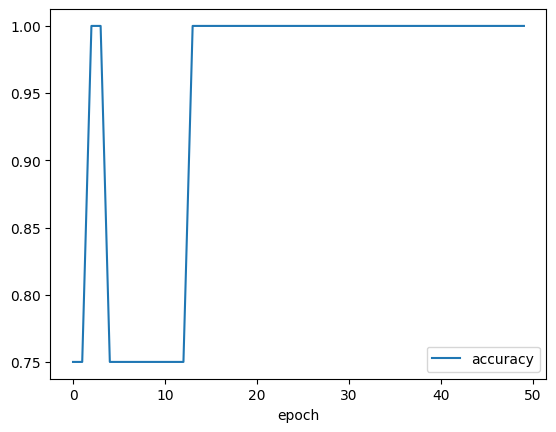

In [10]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.xlabel('epoch')
plt.legend()

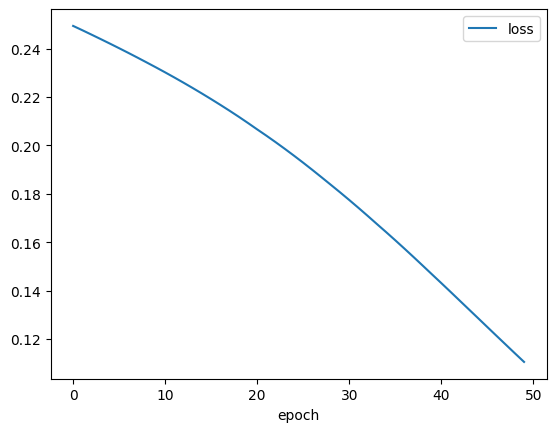

In [11]:
plt.plot(r.history['loss'],label='loss')
plt.xlabel('epoch')
plt.legend()

In [12]:
model.save("and_logic_gate.h5")